# Logic Gates Visualization

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import pearsonr

import sys
sys.path.append("../")
from biologiclib.modelBase import *
from biologiclib.plotUtils import *
from biologiclib.inference import *
from rm_outlier import *

%matplotlib inline

In [4]:
# Read expression matrix

h9_exp_mat = pd.read_csv("../data/GSE75748/h9_imputed.tsv",
                         sep = "\t", index_col = 0)
h9_exp_mat.head()

,SRR2977655,SRR2977656,SRR2977657,SRR2977658,SRR2977659,SRR2977660,SRR2977661,SRR2977662,SRR2977663,SRR2977664,...,SRR2977807,SRR2977808,SRR2977809,SRR2977810,SRR2977811,SRR2977812,SRR2977813,SRR2977814,SRR2977815,SRR2977816
ENSG00000000003.14,5.333434,5.401781,5.770235,4.661787,6.163233,5.538727,5.245607,5.342846,5.332342,4.015143,...,5.051099,5.530516,3.392994,5.732665,5.679862,5.603962,5.248733,5.265112,5.444956,3.658732
ENSG00000000005.5,0.405174,1.249968,0.382527,0.368489,0.392334,0.368489,1.645401,0.405174,0.504082,3.131879,...,0.535048,0.719265,0.152943,3.743526,0.602072,3.538463,0.656286,0.690559,3.039113,0.749957
ENSG00000000419.12,4.204045,3.092342,4.310163,4.536766,4.014042,3.381379,4.406172,4.118315,3.951724,3.695306,...,4.643275,3.100543,5.333091,3.417602,4.386976,4.655274,3.856929,4.388999,2.256160,3.578839
ENSG00000000457.13,1.803950,1.249416,0.319675,2.135601,0.757774,2.427578,1.309815,1.590746,3.693367,3.055467,...,3.639198,1.283812,0.285568,0.113242,0.137654,0.535571,3.729450,0.213661,5.374394,0.170811
ENSG00000000460.16,3.753187,0.244273,0.172557,4.943733,4.321864,4.409670,3.152386,3.976263,2.295498,4.773156,...,3.844763,0.964174,4.893142,4.961760,2.728839,4.073061,2.138180,4.200864,3.579143,2.512359


In [8]:
# Select reporter RNAs

id_inducer, ver_inducer = "ENSG00000235795", 1    #lncRNA AC093157.2
#id_inducer, ver_inducer = "ENSG00000235910", 1    # APOA1-AS
mat_inducer = h9_exp_mat.loc[id_inducer + '.' + str(ver_inducer)]
# load the logic gate table
logic_gates = pd.read_csv("../data/GSE75748/detected_logi_w_coor.tsv", sep = "\t")
#display(logic_gates.head())
related_df = logic_gates[logic_gates['id_inducer'] == id_inducer]
mat_reporter = h9_exp_mat.loc[
    (related_df['id_reporter'] + '.' + related_df['ver_reporter'].astype(str)).tolist()]
print(mat_reporter.shape[0], 'reporter RNAs found')
display(mat_reporter.head())

78 reporter RNAs found


,SRR2977655,SRR2977656,SRR2977657,SRR2977658,SRR2977659,SRR2977660,SRR2977661,SRR2977662,SRR2977663,SRR2977664,...,SRR2977807,SRR2977808,SRR2977809,SRR2977810,SRR2977811,SRR2977812,SRR2977813,SRR2977814,SRR2977815,SRR2977816
ENSG00000069122.18,0.055033,0.009099,0.000000,0.045406,0.000000,0.045406,0.020176,0.055033,0.057387,0.045406,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000
ENSG00000092607.13,0.040161,0.045273,0.007729,0.027754,0.000000,0.027754,0.035483,0.040161,0.074570,0.027754,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000
ENSG00000125531.6,0.077325,0.061356,0.026837,0.071045,0.024380,0.071045,1.001532,0.077325,0.069164,0.071045,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000
ENSG00000132026.13,1.555706,0.078409,0.082218,0.304052,0.147787,0.091541,0.085702,0.097614,0.091587,0.089592,...,0.0,0.000000,0.000000,0.001595,0.0,0.0,0.001595,0.000000,0.009663,0.00000
ENSG00000139915.18,0.142880,0.142331,0.074962,2.698552,0.112157,0.149703,0.400203,0.142880,0.147144,0.133072,...,0.0,0.004514,0.010233,0.011802,0.0,0.0,0.184211,0.009755,0.010619,0.00842


Pair No. 1
Best model keywords: ['Hill', 'No_basal_expression', 'Activation']
Best model AIC: -1191.8341585550277
Best model parameters: {'alpha': 0.07832955091466699, 'K': 0.020012891233433923, 'n': 7.077527290842293}
Time elapse: 6.778475284576416
Pair No. 2
Best model keywords: ['Quadratic', 'No_basal_expression', 'Activation']
Best model AIC: -1100.491791801868
Best model parameters: {'alpha': 0.07501587228359059, 'K': 0.015224307702721296}
Time elapse: 6.733262062072754
Pair No. 3
Best model keywords: ['Hill', 'No_basal_expression', 'Activation']
Best model AIC: -1456.2033578850587
Best model parameters: {'alpha': 0.09651449803518003, 'K': 0.025485222929450442, 'n': 1.3217185785911094}
Time elapse: 3.1681668758392334
Pair No. 4
Best model keywords: ['Michaelis_Menten', 'Basal_expression', 'Activation']
Best model AIC: -1212.8582265974844
Best model parameters: {'alpha': 0.08916892637069303, 'b': 0.0027362458345670674, 'K': 0.005657669669941611}
Time elapse: 4.22499418258667
Pair N

Pair No. 36
Best model keywords: ['Quadratic', 'No_basal_expression', 'Activation']
Best model AIC: -1328.3902708865498
Best model parameters: {'alpha': 0.030661615501183036, 'K': 0.002267258007401373}
Time elapse: 4.408084869384766
Pair No. 37
Best model keywords: ['Quadratic', 'No_basal_expression', 'Activation']
Best model AIC: -1150.4350690001665
Best model parameters: {'alpha': 0.053391499113822356, 'K': 0.0023071810742379835}
Time elapse: 3.4616966247558594
Pair No. 38
Best model keywords: ['Quadratic', 'No_basal_expression', 'Activation']
Best model AIC: -1204.0972882692945
Best model parameters: {'alpha': 0.1007213347553208, 'K': 0.020852649012639935}
Time elapse: 4.526576519012451
Pair No. 39
Best model keywords: ['Quadratic', 'No_basal_expression', 'Activation']
Best model AIC: -1325.295523227804
Best model parameters: {'alpha': 0.2733418204613252, 'K': 0.0762453530631571}
Time elapse: 4.257076740264893
Pair No. 40
Best model keywords: ['Quadratic', 'No_basal_expression', 'Ac

Pair No. 71
Best model keywords: ['Michaelis_Menten', 'Basal_expression', 'Activation']
Best model AIC: -1166.4850852260893
Best model parameters: {'alpha': 0.26890939272519054, 'b': 0.010301257241082646, 'K': 0.024166348004320208}
Time elapse: 5.560539960861206
Pair No. 72
Best model keywords: ['Quadratic', 'No_basal_expression', 'Activation']
Best model AIC: -1283.5941189615107
Best model parameters: {'alpha': 0.048268658353817134, 'K': 0.012243764995286087}
Time elapse: 4.8101465702056885
Pair No. 73
Best model keywords: ['Quadratic', 'No_basal_expression', 'Activation']
Best model AIC: -1187.9938980811603
Best model parameters: {'alpha': 0.07224922194363702, 'K': 0.006421890610614692}
Time elapse: 6.942239284515381
Pair No. 74
Best model keywords: ['Quadratic', 'No_basal_expression', 'Activation']
Best model AIC: -1531.2815497122754
Best model parameters: {'alpha': 0.0781561155159673, 'K': 0.037773270705430954}
Time elapse: 3.9976866245269775
Pair No. 75
Best model keywords: ['Quad

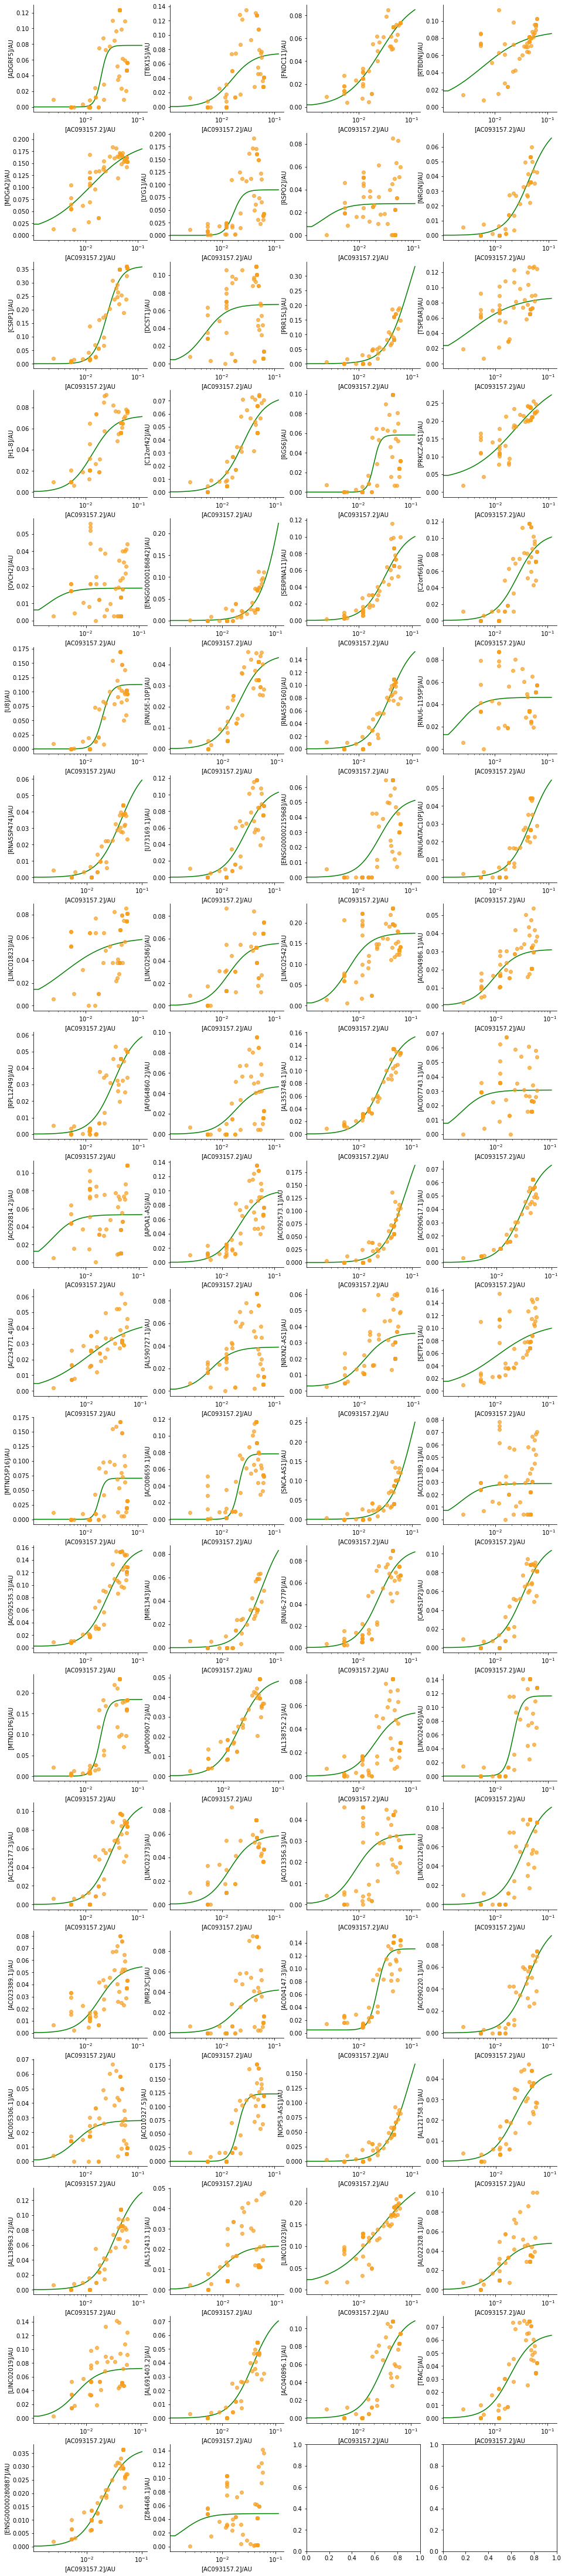

In [6]:
# plot

NCOL, SIZE = 4, 4
nplots = mat_reporter.shape[0]
nrow = int(np.ceil(nplots / NCOL))

_, axes = plt.subplots(nrow, NCOL, figsize = (NCOL * SIZE, nrow * SIZE))
axes = axes.ravel()

count_x_all = mat_inducer.tolist()
inducer_name = logic_gates[logic_gates['id_inducer'] == id_inducer].iloc[0]['symbol_inducer']
i = 1
# becareful that iterrows() returns (index, row_Series)
for ax, (id_reporter, count_y_all) in zip(axes, mat_reporter.iterrows()):
    # remove outliers
    count_x, count_y = remove_outliers_2d(count_x_all, count_y_all)
    # Undo log-scale
    count_x, count_y = np.exp(count_x) - 1, np.exp(count_y) - 1
    r, _ = pearsonr(count_x, count_y)
    if r > 0:
        model_set = ModelSet.Activation_System
    else:
        model_set = ModelSet.Repression_System
    # fitting
    start_time = time.time()
    best_model, all_models = selectModel(count_x.reshape(-1, 1),
                            count_y,
                            modelSolver = ModelSolver.SLSQP,
                            modelSet = model_set,
                            parallel = False)
    elapsed = time.time() - start_time
    best_model_specs = [spec.name for spec in best_model.modelSpecs]
    print("Pair No.", i)
    print("Best model keywords:", best_model_specs)
    print("Best model AIC:", best_model.IC)
    print("Best model parameters:", 
          {key: val for key, val in zip(best_model.thetaKey, best_model.thetaVal)})
    print("Time elapse:", elapsed)
    
    reporter_name = logic_gates[logic_gates['id_reporter'] == id_reporter.split('.')[0]].iloc[0]['symbol_reporter']
    plotHelper(count_x.reshape(-1, 1), count_y, best_model,
            inducer_name = inducer_name, reporter_name = reporter_name,
            ax = ax,
            logScale = True,
            markersize = 6)
    i += 1

83 inducer RNAs found


,SRR2977655,SRR2977656,SRR2977657,SRR2977658,SRR2977659,SRR2977660,SRR2977661,SRR2977662,SRR2977663,SRR2977664,...,SRR2977807,SRR2977808,SRR2977809,SRR2977810,SRR2977811,SRR2977812,SRR2977813,SRR2977814,SRR2977815,SRR2977816
ENSG00000235910.1,0.073630,0.038857,0.013347,0.064720,0.024841,0.210912,0.048139,0.873438,0.087161,0.063368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
ENSG00000141431.9,0.186223,0.440436,0.012873,0.173103,0.005500,0.173103,0.117865,0.186223,0.206876,0.162327,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
ENSG00000144214.9,0.041658,0.023130,0.007224,0.038609,0.024024,0.038609,0.219990,0.041658,0.063237,0.030863,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003382,0.0
ENSG00000252081.1,0.064676,0.049511,0.008557,0.072235,0.008557,0.072235,0.685245,0.064676,0.063863,0.061086,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
ENSG00000255334.1,0.036048,0.047824,0.013587,0.033407,0.013587,0.033407,1.088060,0.036048,0.039056,0.033407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


Pair No. 1
Best model keywords: ['Hill', 'No_basal_expression', 'Activation']
Best model AIC: -1124.810168497098
Best model parameters: {'alpha': 0.10610482634131657, 'K': 0.012460699807162126, 'n': 8.072130102736924}
Time elapse: 2.885256290435791
Pair No. 2
Best model keywords: ['Quadratic', 'No_basal_expression', 'Activation']
Best model AIC: -1039.4469040469219
Best model parameters: {'alpha': 0.09127367909112291, 'K': 0.0007790487844180476}
Time elapse: 5.885047674179077
Pair No. 3
Best model keywords: ['Quadratic', 'No_basal_expression', 'Activation']
Best model AIC: -1129.9098447274012
Best model parameters: {'alpha': 0.10503316615202565, 'K': 0.006703743464232733}
Time elapse: 3.0324060916900635
Pair No. 4
Best model keywords: ['Michaelis_Menten', 'No_basal_expression', 'Activation']
Best model AIC: -1063.5055146285647
Best model parameters: {'alpha': 0.09707149715341255, 'K': 0.0034066950756790697}
Time elapse: 2.648986577987671
Pair No. 5
Best model keywords: ['Michaelis_Ment

Pair No. 35
Best model keywords: ['Michaelis_Menten', 'No_basal_expression', 'Activation']
Best model AIC: -1159.3641721358863
Best model parameters: {'alpha': 0.11359529200840382, 'K': 0.004338365846222242}
Time elapse: 2.691037654876709
Pair No. 36
Best model keywords: ['Hill', 'No_basal_expression', 'Activation']
Best model AIC: -1115.6246686766517
Best model parameters: {'alpha': 0.14471316725244604, 'K': 0.025925787250033538, 'n': 0.6537155121552518}
Time elapse: 3.6431219577789307
Pair No. 37
Best model keywords: ['Michaelis_Menten', 'Basal_expression', 'Activation']
Best model AIC: -1084.5539213220266
Best model parameters: {'alpha': 0.10762276698524148, 'b': 0.007621510765251122, 'K': 0.0022394368729373344}
Time elapse: 3.3046178817749023
Pair No. 38
Best model keywords: ['Michaelis_Menten', 'No_basal_expression', 'Activation']
Best model AIC: -1152.1664353121662
Best model parameters: {'alpha': 0.11843614776435955, 'K': 0.005255448138359909}
Time elapse: 2.9157004356384277
Pai

Pair No. 68
Best model keywords: ['Quadratic', 'No_basal_expression', 'Inducer_Michaelis_Menten', 'Repression', 'Inducer_Repression', 'Inducer']
Best model AIC: -1067.5814995369299
Best model parameters: {'b': 0.10323597310747136, 'K': -0.2573974547864549, 'K_I': 0.004442539005445032}
Time elapse: 4.624078989028931
Pair No. 69
Best model keywords: ['Michaelis_Menten', 'No_basal_expression', 'Activation']
Best model AIC: -1256.0623797275412
Best model parameters: {'alpha': 0.20302168166078036, 'K': 0.0366665493189415}
Time elapse: 2.6945066452026367
Pair No. 70
Best model keywords: ['Michaelis_Menten', 'No_basal_expression', 'Activation']
Best model AIC: -1118.8656284459646
Best model parameters: {'alpha': 0.20137864479331152, 'K': 0.028600031683477453}
Time elapse: 4.641106605529785
Pair No. 71
Best model keywords: ['Michaelis_Menten', 'No_basal_expression', 'Activation']
Best model AIC: -1236.562056272745
Best model parameters: {'alpha': 0.21488993067063417, 'K': 0.21395682069398703}


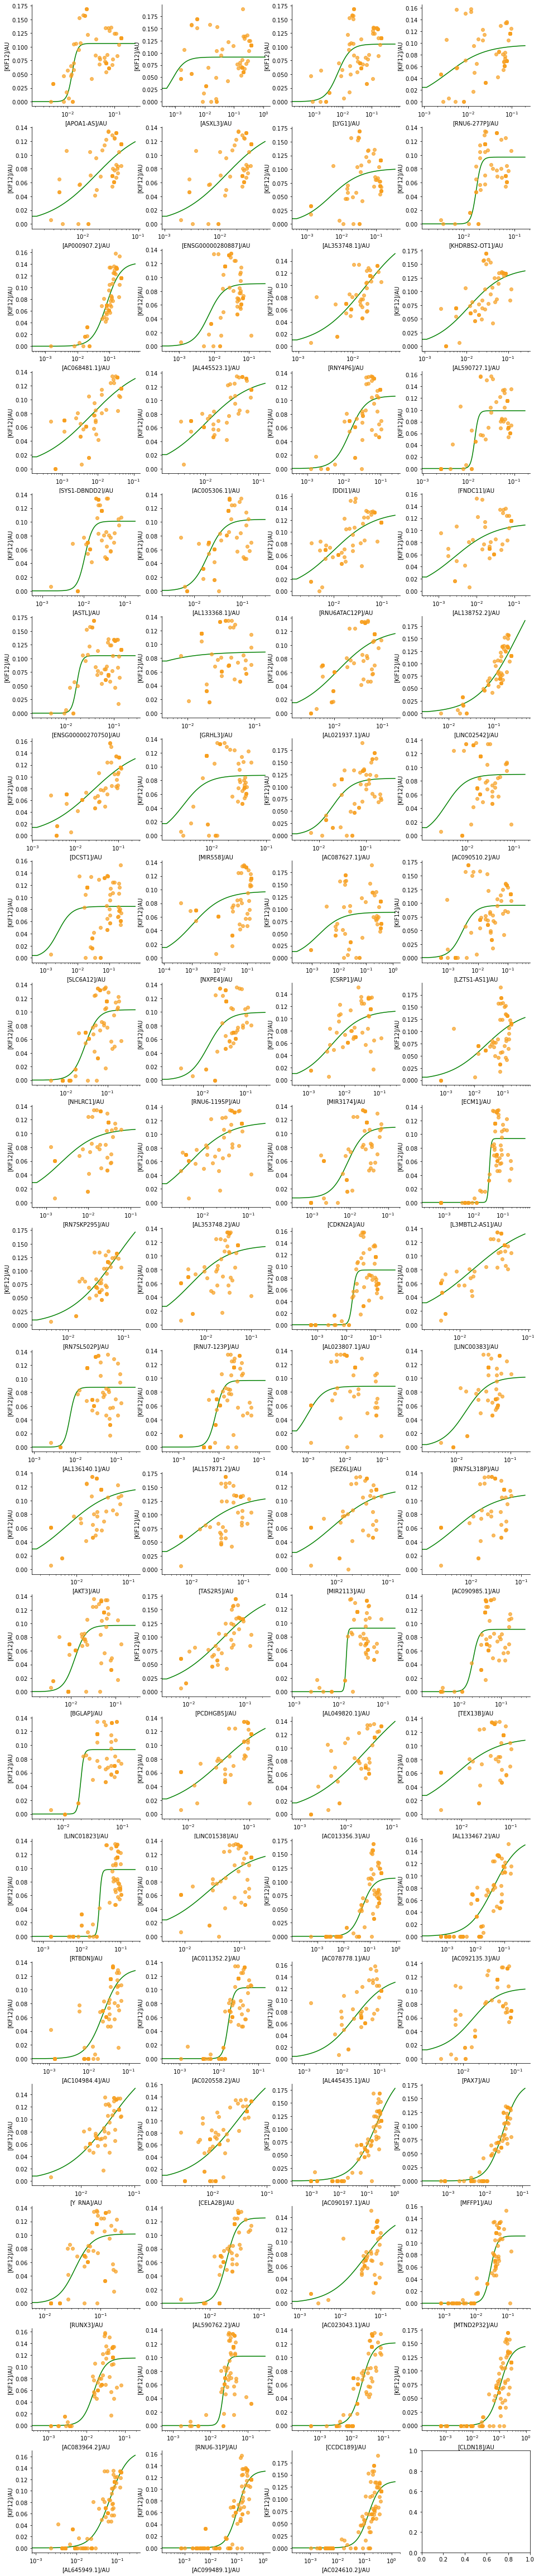

In [10]:
# Select reporter RNAs

#id_inducer, ver_inducer = "ENSG00000235795", 1
id_reporter, ver_reporter = "ENSG00000136883", 12
mat_reporter = h9_exp_mat.loc[id_reporter + '.' + str(ver_reporter)]
# load the logic gate table
logic_gates = pd.read_csv("../data/GSE75748/detected_logi_w_coor.tsv", sep = "\t")
#display(logic_gates.head())
related_df = logic_gates[logic_gates['id_reporter'] == id_reporter]
mat_inducer = h9_exp_mat.loc[
    (related_df['id_inducer'] + '.' + related_df['ver_inducer'].astype(str)).tolist()]
print(mat_inducer.shape[0], 'inducer RNAs found')
display(mat_inducer.head())

# plot

NCOL, SIZE = 4, 4
nplots = mat_inducer.shape[0]
nrow = int(np.ceil(nplots / NCOL))

_, axes = plt.subplots(nrow, NCOL, figsize = (NCOL * SIZE, nrow * SIZE))
axes = axes.ravel()

count_y_all = mat_reporter.tolist()
reporter_name = logic_gates[logic_gates['id_reporter'] == id_reporter].iloc[0]['symbol_reporter']
i = 1
# becareful that iterrows() returns (index, row_Series)
for ax, (id_inducer, count_x_all) in zip(axes, mat_inducer.iterrows()):
    # remove outliers
    count_x, count_y = remove_outliers_2d(count_x_all, count_y_all)
    # Undo log-scale
    count_x, count_y = np.exp(count_x) - 1, np.exp(count_y) - 1
    r, _ = pearsonr(count_x, count_y)
    if r > 0:
        model_set = ModelSet.Activation_System
    else:
        model_set = ModelSet.Repression_System
    # fitting
    start_time = time.time()
    best_model, all_models = selectModel(count_x.reshape(-1, 1),
                            count_y,
                            modelSolver = ModelSolver.SLSQP,
                            modelSet = model_set,
                            parallel = False)
    elapsed = time.time() - start_time
    best_model_specs = [spec.name for spec in best_model.modelSpecs]
    print("Pair No.", i)
    print("Best model keywords:", best_model_specs)
    print("Best model AIC:", best_model.IC)
    print("Best model parameters:", 
          {key: val for key, val in zip(best_model.thetaKey, best_model.thetaVal)})
    print("Time elapse:", elapsed)
    
    inducer_name = logic_gates[logic_gates['id_inducer'] == id_inducer.split('.')[0]].iloc[0]['symbol_inducer']
    plotHelper(count_x.reshape(-1, 1), count_y, best_model,
            inducer_name = inducer_name, reporter_name = reporter_name,
            ax = ax,
            logScale = True,
            markersize = 6)
    i += 1